In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session






In [71]:
import os
import pandas as pd
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [3]:
path = os.getcwd()

In [4]:
#Load training, test data.
df_train = pd.read_csv(path+'/train.csv')
#df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')



#evaluate if data is spatially aligned

#train neural network

#perform validation

#tune hyperparameters

#make predictions

#Evaluate accuracy and performance metrics

#address shortcomings with different activations, dimensionality reduction using pca, 

#identify rows which are failing identification to gain insight into the reason wht its failing.

#specifically apply a convolutional neural network which learns spatial data such as images to identify characteristic patterns.





In [5]:
#convert columns to a matrix.
df_train.drop(columns={'label'}).iloc[0:1].to_numpy().reshape(28,28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [6]:
#convert columns to an image
#divide by 255 to put values into optimal range for neural network training
image_matrix = df_train.drop(columns={'label'}).to_numpy().reshape(-1, 28,28)/255.0



# Now.. to learn features using convolution
#it appears sklearn doesn't implement convolutional neural networks.

#Then lets train it better by creating perturbed data by translating the images 1 pixel over.

#how would i shift all pixels over by one in a matrix and fill with zeros.
#I could create 4 shift fuctions.
#np.roll()
shifted_matrix_right = np.roll(image_matrix, shift=1, axis=2)
#This works but is a circular array where it wraps the edge to the other side.

#scipy.ndimage.shift should just shift.
# lets see if this even works.
shifted_matrix_left = np.roll(image_matrix, shift=-1, axis=2)

#then concatenate them all
#image_matrix_all = np.concatenate((matrix1, matrix2), axis=0)
#Same as image_matrix_all = np.vstack((matrix1, matrix2)) if axis=0.

#image_matrix_all = np.vstack((image_matrix, shifted_matrix_right))
#image_matrix_all = np.vstack((image_matrix_all, shifted_matrix_left))
#image_matrix_all = np.vstack(image_matrix_all, shifted_matrix_up)
#image_matrix_all = np.vstack(image_matrix_all, shifted_matrix_down)

#It takes an array of matrixes to stack, so I can specify a single array of 3 matrices to concatenate together in a single assignment.
image_matrix = np.vstack((image_matrix, shifted_matrix_left, shifted_matrix_right))

#Make the labels array match the same shape
#df_train['label']
#labels = df_train['label'].to_numpy().reshape(-1, 1)
#labels = np.vstack((labels,labels,labels))


In [7]:
#Make the labels array match the same shape
labels = df_train['label'].to_numpy().reshape(-1, 1)

In [8]:
#use sklearn pipeline to create a standard scalar.


In [9]:
labels

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], shape=(42000, 1))

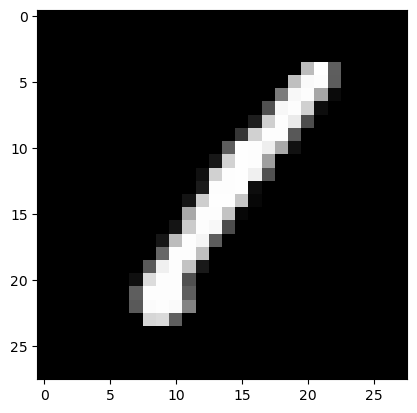

In [10]:
#convert columns to an image
#divide by 255 to put values into optimal range for neural network training
#image_matrix = df_train.drop(columns={'label'}).to_numpy().reshape(-1, 28,28)/255.0
X = image_matrix.reshape(-1, 784)

#convert y to a one-hot encoding (can be pipelined)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(labels)
y = one_hot_encoded

#df_train['label']


plt.imshow(image_matrix[0], cmap='gray')
plt.show()

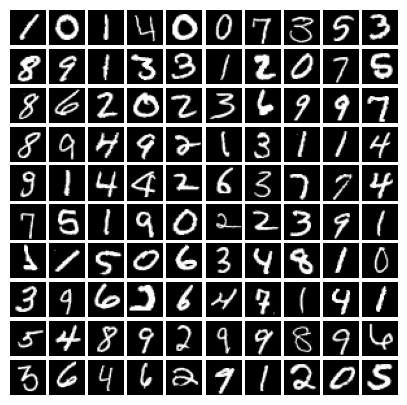

In [92]:
#Generate panel of 10x10 image digits
# Create a 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

# Remove space between plots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(image_matrix[i * 10 + j], cmap='gray')
        ax.axis('off')  # Hide axes

fig.set_size_inches(5, 5)
plt.savefig('mnist sample.png', bbox_inches='tight', pad_inches=0, dpi=75)
plt.show()
plt.close()  # Close the figure to free memory


In [11]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [12]:
# Tune hyperparameters
# it seems to be converging so maybe the solver isnt the issue
# its probably the neural network not learning higher order features
#so lets try various network sizes


#try a CNN



In [13]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=150,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate='adaptive',
    learning_rate_init=0.2,
    
)



In [31]:
# Define the hyperparameter grid

#parameter_space = {
#    'hidden_layer_sizes': [(40, 40),(40,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}

parameter_space = {
    'hidden_layer_sizes': [ (40, 20), (60,8), (20,20,20) ],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(mlp, parameter_space, cv=5, scoring='accuracy', n_jobs=-1, verbose=4)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36914253
Iteration 2, loss = 0.80794992
Iteration 3, loss = 0.75843726
Iteration 4, loss = 0.70087314
Iteration 5, loss = 0.65907827
Iteration 6, loss = 0.63901354
Iteration 7, loss = 0.60280619
Iteration 8, loss = 0.59069576
Iteration 9, loss = 0.58962250
Iteration 10, loss = 0.55754508
Iteration 11, loss = 0.55461079
Iteration 12, loss = 0.53675860
Iteration 13, loss = 0.53523606
Iteration 14, loss = 0.50506801
Iteration 15, loss = 0.49363338
Iteration 16, loss = 0.47205166
Iteration 17, loss = 0.46181542
Iteration 18, loss = 0.44889880
Iteration 19, loss = 0.43897317
Iteration 20, loss = 0.43139018
Iteration 21, loss = 0.41642343
Iteration 22, loss = 0.40839469
Iteration 23, loss = 0.39332893
Iteration 24, loss = 0.38730224
Iteration 25, loss = 0.38135513
Iteration 26, loss = 0.37983930
Iteration 27, loss = 0.37731719
Iteration 28, loss = 0.37527495
Iteration 29, loss = 0.35466122
Iteration 30, loss = 0.34651499
Iteration 31, loss = 0.34412659
Iteration 32, los

In [21]:
best_params

{'activation': 'tanh',
 'alpha': 0.05,
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [22]:
#Apply the best parameters
mlp.set_params(
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    solver=best_params['solver']
              )

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(40,),
              learning_rate_init=0.2, max_iter=150, random_state=1,
              solver='sgd', verbose=10)

In [34]:
mlp.set_params(
    hidden_layer_sizes=(40,20),
)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(40, 20),
              learning_rate_init=0.2, max_iter=150, random_state=1,
              solver='sgd', verbose=10)

In [35]:
mlp.get_params()

{'activation': 'tanh',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (40, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.2,
 'max_fun': 15000,
 'max_iter': 150,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 10,
 'warm_start': False}

In [36]:
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.36914253
Iteration 2, loss = 0.80794992
Iteration 3, loss = 0.75843726
Iteration 4, loss = 0.70087314
Iteration 5, loss = 0.65907827
Iteration 6, loss = 0.63901354
Iteration 7, loss = 0.60280619
Iteration 8, loss = 0.59069576
Iteration 9, loss = 0.58962250
Iteration 10, loss = 0.55754508
Iteration 11, loss = 0.55461079
Iteration 12, loss = 0.53675860
Iteration 13, loss = 0.53523606
Iteration 14, loss = 0.50506801
Iteration 15, loss = 0.49363338
Iteration 16, loss = 0.47205166
Iteration 17, loss = 0.46181542
Iteration 18, loss = 0.44889880
Iteration 19, loss = 0.43897317
Iteration 20, loss = 0.43139018
Iteration 21, loss = 0.41642343
Iteration 22, loss = 0.40839469
Iteration 23, loss = 0.39332893
Iteration 24, loss = 0.38730224
Iteration 25, loss = 0.38135513
Iteration 26, loss = 0.37983930
Iteration 27, loss = 0.37731719
Iteration 28, loss = 0.37527495
Iteration 29, loss = 0.35466122
Iteration 30, loss = 0.34651499
Iteration 31, loss = 0.34412659
Iteration 32, los

In [24]:
#evaluate cfoss-validation scores
scores = cross_val_score(mlp, X_train, y_train, cv=5)
scores

Iteration 1, loss = 1.37919561
Iteration 2, loss = 0.70525113
Iteration 3, loss = 0.63456058
Iteration 4, loss = 0.60085316
Iteration 5, loss = 0.57314303
Iteration 6, loss = 0.56032433
Iteration 7, loss = 0.54587284
Iteration 8, loss = 0.53123661
Iteration 9, loss = 0.52652683
Iteration 10, loss = 0.51600127
Iteration 11, loss = 0.50575162
Iteration 12, loss = 0.49402111
Iteration 13, loss = 0.48550650
Iteration 14, loss = 0.47903273
Iteration 15, loss = 0.46306229
Iteration 16, loss = 0.45564559
Iteration 17, loss = 0.44835145
Iteration 18, loss = 0.43884031
Iteration 19, loss = 0.43161324
Iteration 20, loss = 0.41749907
Iteration 21, loss = 0.41473260
Iteration 22, loss = 0.40996823
Iteration 23, loss = 0.40378289
Iteration 24, loss = 0.39718632
Iteration 25, loss = 0.39638136
Iteration 26, loss = 0.39104634
Iteration 27, loss = 0.38586085
Iteration 28, loss = 0.38324581
Iteration 29, loss = 0.37898410
Iteration 30, loss = 0.37747457
Iteration 31, loss = 0.36982386
Iteration 32, los

/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.32300385
Iteration 2, loss = 0.67258679
Iteration 3, loss = 0.61322096
Iteration 4, loss = 0.57342997
Iteration 5, loss = 0.55483364
Iteration 6, loss = 0.54301771
Iteration 7, loss = 0.52649968
Iteration 8, loss = 0.51527211
Iteration 9, loss = 0.50556130
Iteration 10, loss = 0.49510507
Iteration 11, loss = 0.48667317
Iteration 12, loss = 0.47851342
Iteration 13, loss = 0.47134378
Iteration 14, loss = 0.46868284
Iteration 15, loss = 0.45711313
Iteration 16, loss = 0.45613700
Iteration 17, loss = 0.44948607
Iteration 18, loss = 0.44433707
Iteration 19, loss = 0.43367896
Iteration 20, loss = 0.43230061
Iteration 21, loss = 0.42158524
Iteration 22, loss = 0.41619331
Iteration 23, loss = 0.41049589
Iteration 24, loss = 0.40543974
Iteration 25, loss = 0.39613853
Iteration 26, loss = 0.39534624
Iteration 27, loss = 0.39289793
Iteration 28, loss = 0.39023935
Iteration 29, loss = 0.38532525
Iteration 30, loss = 0.38267536
Iteration 31, loss = 0.37877259
Iteration 32, los

/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.38224262
Iteration 2, loss = 0.74296093
Iteration 3, loss = 0.66473680
Iteration 4, loss = 0.62142721
Iteration 5, loss = 0.59125312
Iteration 6, loss = 0.56163179
Iteration 7, loss = 0.54711347
Iteration 8, loss = 0.52882374
Iteration 9, loss = 0.51313040
Iteration 10, loss = 0.49742059
Iteration 11, loss = 0.48998815
Iteration 12, loss = 0.48468612
Iteration 13, loss = 0.47566387
Iteration 14, loss = 0.46973413
Iteration 15, loss = 0.46483741
Iteration 16, loss = 0.45785094
Iteration 17, loss = 0.44907486
Iteration 18, loss = 0.44885879
Iteration 19, loss = 0.44293036
Iteration 20, loss = 0.42896346
Iteration 21, loss = 0.42755269
Iteration 22, loss = 0.42206342
Iteration 23, loss = 0.40992459
Iteration 24, loss = 0.40039296
Iteration 25, loss = 0.39932367
Iteration 26, loss = 0.39387898
Iteration 27, loss = 0.38259506
Iteration 28, loss = 0.38581972
Iteration 29, loss = 0.37756515
Iteration 30, loss = 0.37541077
Iteration 31, loss = 0.37542587
Iteration 32, los

/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.43004024
Iteration 2, loss = 0.79932510
Iteration 3, loss = 0.71116672
Iteration 4, loss = 0.67477004
Iteration 5, loss = 0.64933277
Iteration 6, loss = 0.63248272
Iteration 7, loss = 0.60249204
Iteration 8, loss = 0.59453050
Iteration 9, loss = 0.57993062
Iteration 10, loss = 0.56748267
Iteration 11, loss = 0.55235906
Iteration 12, loss = 0.53365130
Iteration 13, loss = 0.50708322
Iteration 14, loss = 0.49721408
Iteration 15, loss = 0.48132031
Iteration 16, loss = 0.47100974
Iteration 17, loss = 0.45977825
Iteration 18, loss = 0.45593031
Iteration 19, loss = 0.44944983
Iteration 20, loss = 0.44231535
Iteration 21, loss = 0.44052168
Iteration 22, loss = 0.43649354
Iteration 23, loss = 0.42474027
Iteration 24, loss = 0.41937681
Iteration 25, loss = 0.41901264
Iteration 26, loss = 0.41775509
Iteration 27, loss = 0.40448823
Iteration 28, loss = 0.40058456
Iteration 29, loss = 0.39854813
Iteration 30, loss = 0.39625685
Iteration 31, loss = 0.39224258
Iteration 32, los

/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31095186
Iteration 2, loss = 0.71519809
Iteration 3, loss = 0.65283254
Iteration 4, loss = 0.62591145
Iteration 5, loss = 0.60220665
Iteration 6, loss = 0.59243452
Iteration 7, loss = 0.57194981
Iteration 8, loss = 0.56240193
Iteration 9, loss = 0.54051365
Iteration 10, loss = 0.53134335
Iteration 11, loss = 0.50897063
Iteration 12, loss = 0.49789881
Iteration 13, loss = 0.48074894
Iteration 14, loss = 0.46924983
Iteration 15, loss = 0.47039821
Iteration 16, loss = 0.45566931
Iteration 17, loss = 0.44723963
Iteration 18, loss = 0.44286497
Iteration 19, loss = 0.43330450
Iteration 20, loss = 0.43167344
Iteration 21, loss = 0.42618306
Iteration 22, loss = 0.42356335
Iteration 23, loss = 0.42345586
Iteration 24, loss = 0.41767017
Iteration 25, loss = 0.40940939
Iteration 26, loss = 0.40864983
Iteration 27, loss = 0.40455144
Iteration 28, loss = 0.40851291
Iteration 29, loss = 0.40572363
Iteration 30, loss = 0.39785834
Iteration 31, loss = 0.39412862
Iteration 32, los

/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.92666667, 0.92888889, 0.92746032, 0.93      , 0.92952381])

In [52]:
#Evaluate misclassifications
y_pred = mlp.predict(X)
y_pred


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(42000, 10))

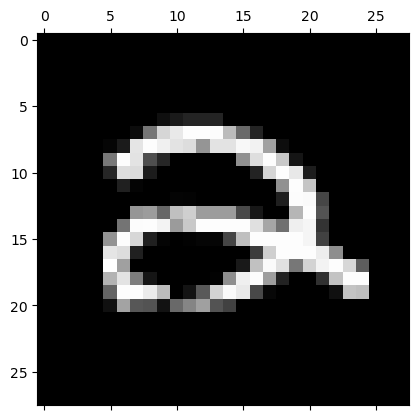

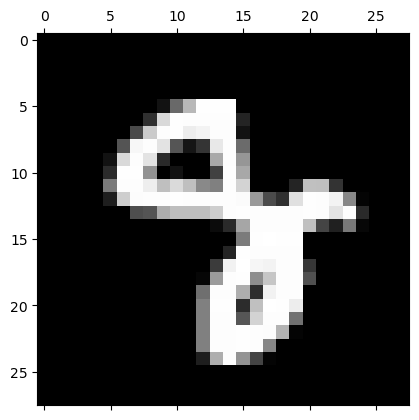

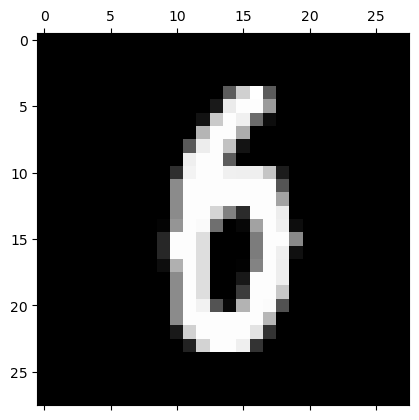

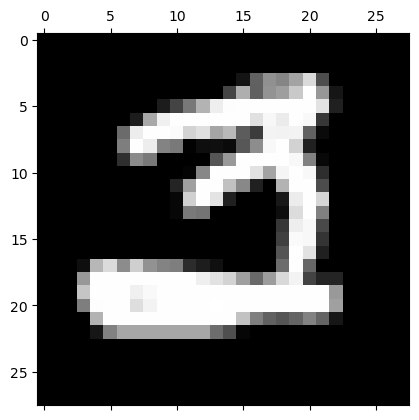

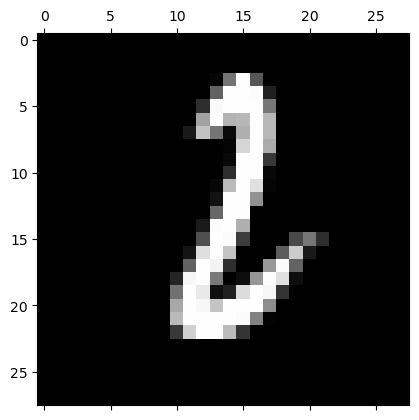

In [59]:
#Find rows which failed prediction
y_pred_inv = encoder.inverse_transform(pred[0:42000])
y_inv = encoder.inverse_transform(y)

#Replace None with -1
y_pred_inv[y_pred_inv == None] = -1

#Visually inspect misclassified digits
df_train[y_pred_inv == None]

#Sample some figures which were incorrectly classified
for i in df_train[failed == None][0:5].index:
    plt.matshow(X[i].reshape(28,28), cmap='gray')

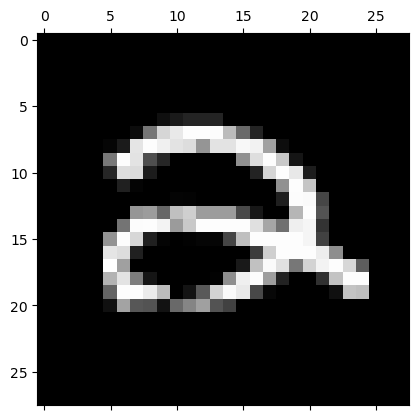

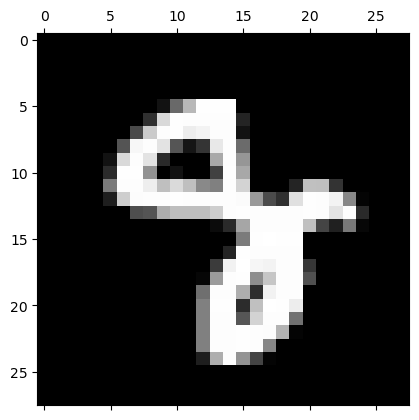

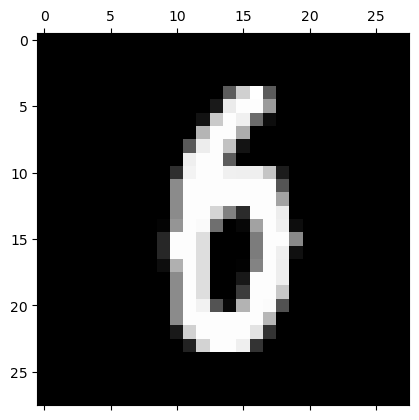

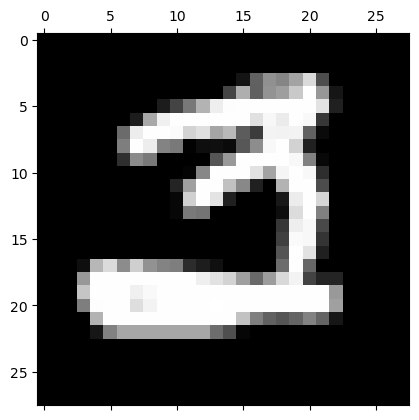

In [39]:
plt.matshow(X[94].reshape(28,28), cmap='gray')
plt.matshow(X[131].reshape(28,28), cmap='gray')
plt.matshow(X[133].reshape(28,28), cmap='gray')
plt.matshow(X[240].reshape(28,28), cmap='gray')


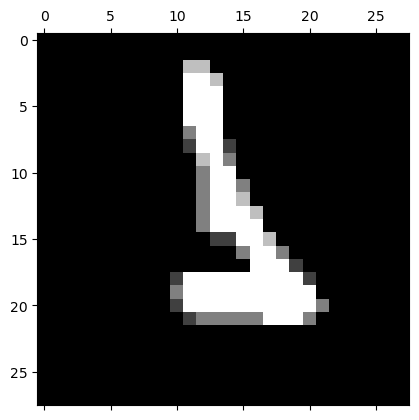

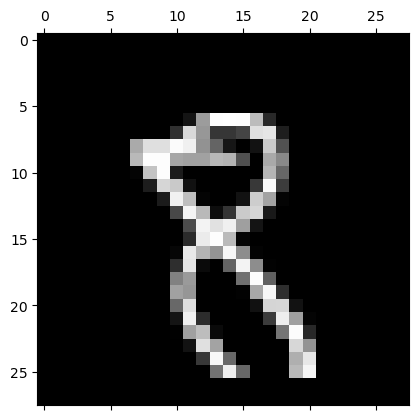

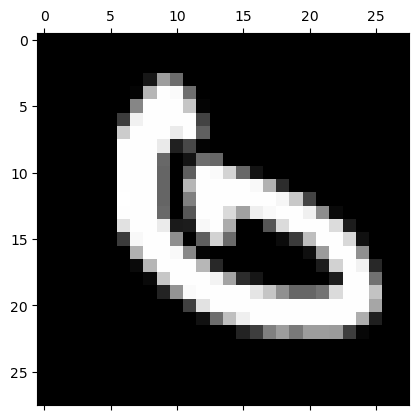

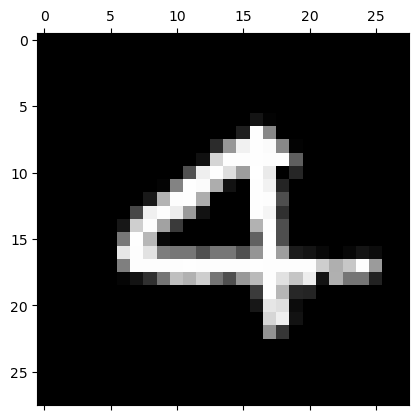

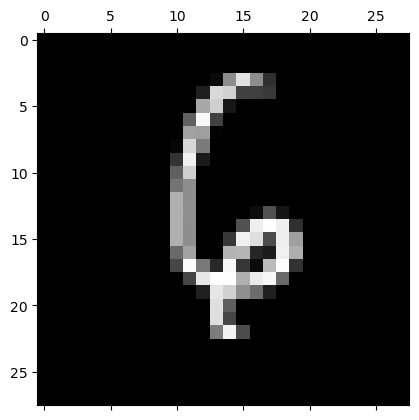

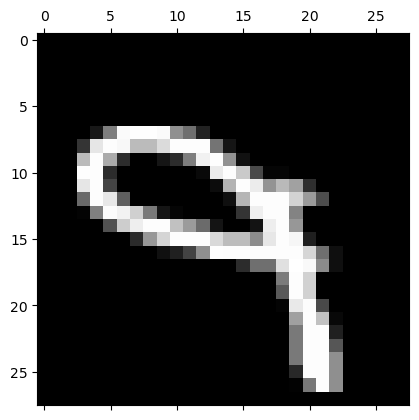

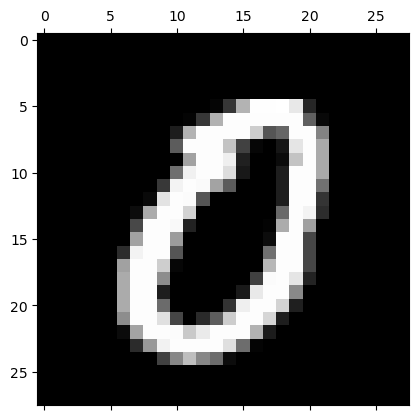

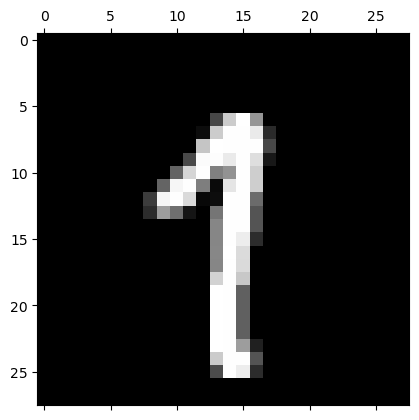

In [101]:
plt.matshow(X[60].reshape(28,28), cmap='gray')
plt.matshow(X[175].reshape(28,28), cmap='gray')
plt.matshow(X[179].reshape(28,28), cmap='gray')
plt.matshow(X[215].reshape(28,28), cmap='gray')
plt.matshow(X[419].reshape(28,28), cmap='gray')
plt.matshow(X[41753].reshape(28,28), cmap='gray')
plt.matshow(X[41747].reshape(28,28), cmap='gray')
plt.matshow(X[41923].reshape(28,28), cmap='gray')



#X[43].shape

In [102]:
image_matrix[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [103]:
shifted_matrix_right[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [104]:
image_matrix.shape

(42000, 28, 28)

In [105]:
image_matrix_all.shape


(126000, 28, 28)

In [106]:
#Best score without translations
#Training set score: 0.988857
#Test set score: 0.911810

#Score with 1px translations
#Training set score: 0.938720
#Test set score: 0.913587

#Apparently reduced score on training
#nothing particularly better on test.

#okay how about trying various network sizes
# with grid search I found the following:  'activation': 'tanh','alpha': 0.05,'learning_rate': 'constant','solver': 'sgd'
# Training set score: 0.974667
# Test set score: 0.933905

#Can we improve with different network topology? Best topology (40,20)
# Training set score: 0.979048
# Test set score: 0.946952


 


In [ ]:
#Lets view the induced network parameters of the network.




In [107]:
#Use PyTorch or Tensorflow to handle learning on GPU


In [83]:
#Classification score
print("\nClassification Report:")
print(classification_report(y, y_pred))
accuracy_score(y, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4132
           1       0.99      0.99      0.99      4684
           2       0.99      0.95      0.97      4177
           3       0.98      0.97      0.97      4351
           4       0.99      0.98      0.98      4072
           5       0.99      0.97      0.98      3795
           6       0.99      0.98      0.99      4137
           7       0.97      0.99      0.98      4401
           8       0.96      0.99      0.97      4063
           9       0.99      0.93      0.96      4188

   micro avg       0.98      0.97      0.98     42000
   macro avg       0.98      0.97      0.98     42000
weighted avg       0.98      0.97      0.98     42000
 samples avg       0.97      0.97      0.97     42000



/Users/stevesnively/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9710238095238095

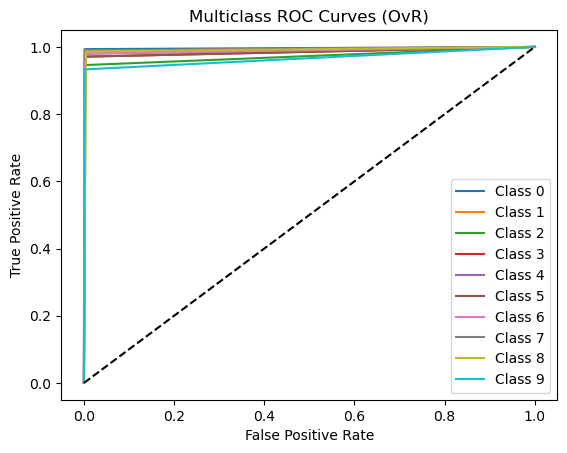

In [84]:
#ROC curve 

#multilabel-indicator format is not supported, there are classes 0-9 so 10 classes, ie multiclass, so we need to perform 
#one roc-curve per class.

# Compute ROC curve for each class
for i in range(10):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (OvR)')
plt.legend()
plt.show()

